# Stage3 - WEEK4
---
stage3는 stage2를 복사해 시작합니다.

---

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/iris.csv')
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


---
#  Feature Engineering and Visualization

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

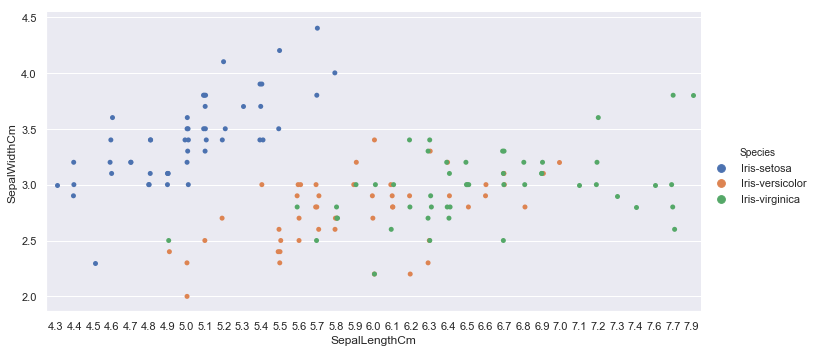

In [4]:
sns.catplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', aspect=2)

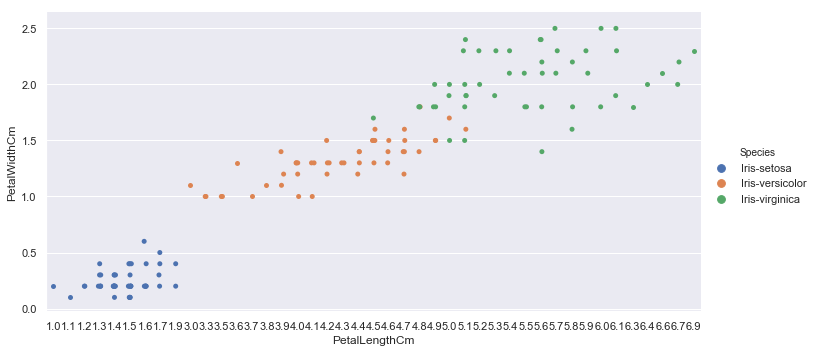

In [5]:
sns.catplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', aspect=2)

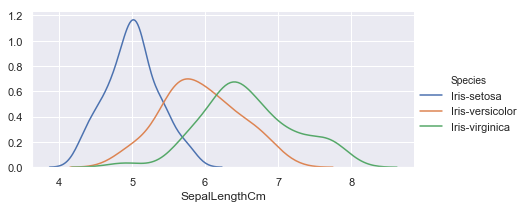

In [6]:
facet = sns.FacetGrid(df, hue="Species", aspect=2)
facet.map(sns.kdeplot, 'SepalLengthCm')
facet.add_legend()

plt.show()

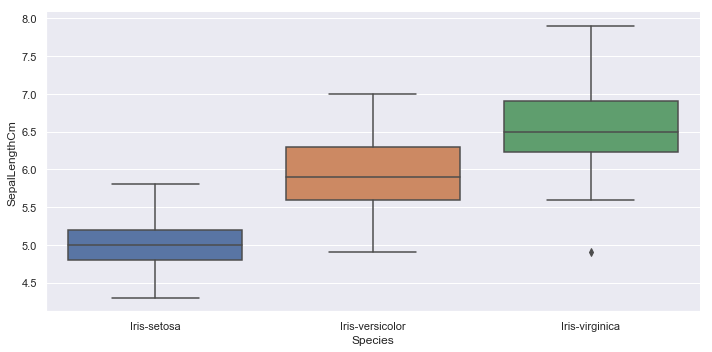

In [7]:
sns.catplot(kind='box', data=df, x='Species', y='SepalLengthCm', aspect=2)

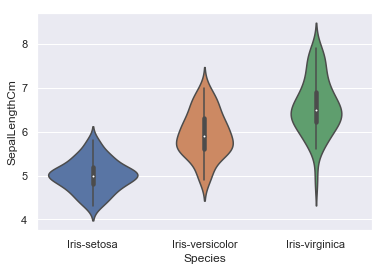

In [8]:
sns.violinplot(data=df, x='Species', y='SepalLengthCm')

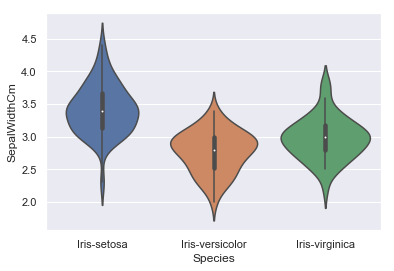

In [9]:
sns.violinplot(data=df, x='Species', y='SepalWidthCm')

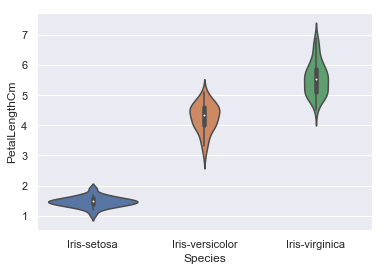

In [10]:
sns.violinplot(data=df, x='Species', y='PetalLengthCm')

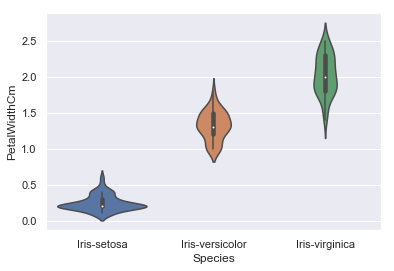

In [11]:
sns.violinplot(data=df, x='Species', y='PetalWidthCm')

---
# 여기서부터 Stage3 입니다.

## 함께실습$1

In [12]:
from sklearn.model_selection import train_test_split

# 훈련을 위한 특징부분과 정답부분 나누기
input_data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
target_data = df['Species']

# 자동으로 75%, 25%로 나눠줍니다.
x_train, x_test, y_train, y_test = train_test_split(input_data, target_data)

x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,4.9,3.0,1.4,0.2
146,6.3,2.5,5.0,1.9
28,5.2,3.4,1.4,0.2
125,7.2,3.2,6.0,1.8
121,5.6,2.8,4.9,2.0
6,4.6,3.4,1.4,0.3
32,5.2,4.1,1.5,0.1
23,5.1,3.3,1.7,0.5
131,7.9,3.8,6.4,2.0
107,7.3,2.9,6.3,1.8


## 함께실습$2

In [13]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

print('training set accuracy:', tree.score(x_train, y_train))
print('test set accuracy:', tree.score(x_test, y_test))

training set accuracy: 1.0
test set accuracy: 0.9473684210526315


## 함께실습$3

In [14]:
prediction = tree.predict(x_test)
prediction

array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

## 함께실습$4

In [15]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10)
forest.fit(x_train, y_train)

print('training set accuracy:', forest.score(x_train, y_train))
print('test set accuracy:', forest.score(x_test, y_test))

prediction_by_forest = forest.predict(x_test)
prediction_by_forest

training set accuracy: 1.0
test set accuracy: 0.9473684210526315


array(['Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)